LOADING DATA

In [1]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = '/content/archive_14.zip'
# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Verify the extracted directories
print(os.listdir("dataset"))

['dataset']


In [4]:
# Проверим содержимое распакованного архива
print(os.listdir('dataset'))


['dataset']


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Пути к данным
train_dir = '/content/dataset/dataset/train'
validation_dir = '/content/dataset/dataset/validation'

# Создание генераторов данных для обучения и валидации
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),  # Размер для ResNet50
    batch_size=32,
    class_mode='categorical'  # Поскольку у нас несколько классов
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)


Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


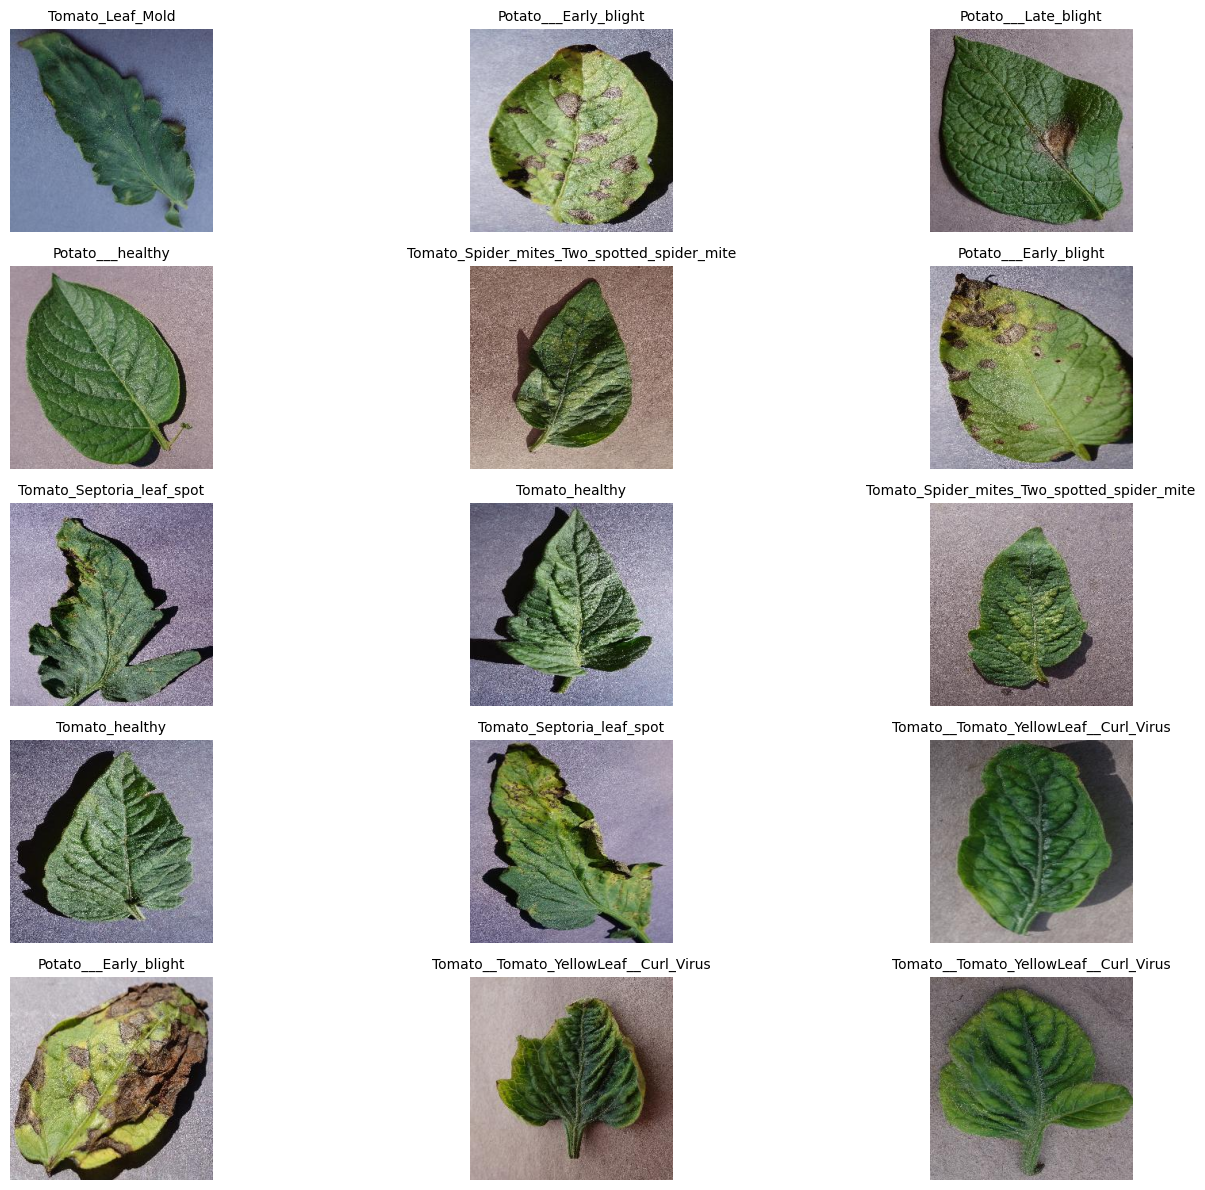

In [46]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

dataset_path = r'/content/dataset/dataset'

data_subset = 'test'
subset_path = os.path.join(dataset_path, data_subset)
subfolders = [f for f in os.listdir(subset_path) if os.path.isdir(os.path.join(subset_path, f))]

num_cols = 3
num_rows = 5
total_images = num_cols * num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.ravel()

for i in range(total_images):

    random_class = random.choice(subfolders)
    class_path = os.path.join(subset_path, random_class)

    image_file = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_file)

    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(random_class, color='black', fontsize=10)


plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall(), AUC()]
)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,644,495 (94.01 MB)

 Trainable params: 1,056,783 (4.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.4772 - auc: 0.9030 - loss: 1.5992 - precision: 0.7727 - recall: 0.1952 - val_accuracy: 0.5264 - val_auc: 0.9175 - val_loss: 1.4823 - val_precision: 0.8195 - val_recall: 0.2417
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.6250 - auc: 0.9376 - loss: 1.3472 - precision: 0.8000 - recall: 0.2500 - val_accuracy: 0.4545 - val_auc: 0.9368 - val_loss: 1.3903 - val_precision: 0.8333 - val_recall: 0.2273
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.5166 - auc: 0.9179 - loss: 1.4759 - precision: 0.7661 - recall: 0.2577 - val_accuracy: 0.5415 - val_auc: 0.9287 - val_loss: 1.4073 - val_precision: 0.7933 - val_recall: 0.2661
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4688 - auc: 0.9075 - loss: 1.5848 - precision: 0.8889 - recall: 0.2500 - val_accuracy: 0.5909 - val_auc: 0.9402 - val_loss: 1.2592 - val_precision: 0.9286 - val_recall: 0.5909
Epoch 5/10
515/515 ━━━━━━━

Validation Accuracy: 0.5087
Validation Precision: 0.6689
Validation Recall: 0.3406
Validation AUC: 0.9294
Validation F1-Score: 0.4513
Model saved successfully.


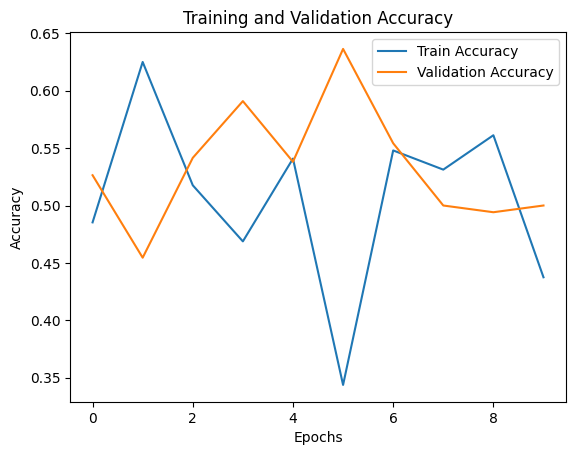

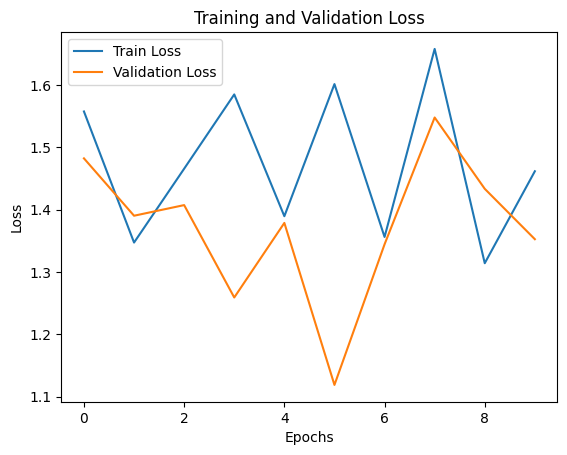

In [8]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation set
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(validation_generator)

# Compute F1-score
f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-7)

# Print evaluation metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Validation F1-Score: {f1_score:.4f}")

# Save the trained model
model.save('resnet50_custom_model.h5')
print("Model saved successfully.")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
train_dir = '/content/dataset/dataset/train'
test_dir = '/content/dataset/dataset/test'
# Image size and batch size
img_size = (160, 160)
batch_size = 32

In [31]:
augmented_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Random rotation
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.1,  # Shear transformations
    zoom_range=0.1,  # Zoom transformations
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest',  # Fill gaps with nearest pixel values
    validation_split=0.2  # Split 20% of data for validation
)


In [32]:
# Training data generator
train_augmented_generator = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset (80%)
)

# Validation data generator
val_generator = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset (20%)
)

# Test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to ensure consistent results
)

Found 13207 images belonging to 15 classes.
Found 3297 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.


Epoch 1/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 264s 407ms/step - accuracy: 0.5992 - auc_10: 0.9013 - loss: 1.9896 - precision_10: 0.7853 - recall_10: 0.5046 - val_accuracy: 0.0925 - val_auc_10: 0.5326 - val_loss: 8.6125 - val_precision_10: 0.0925 - val_recall_10: 0.0925
Epoch 2/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - auc_10: 0.9960 - loss: 0.8505 - precision_10: 0.9688 - recall_10: 0.9688 - val_accuracy: 0.0000e+00 - val_auc_10: 0.9286 - val_loss: 4.1983 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 148s 337ms/step - accuracy: 0.9295 - auc_10: 0.9951 - loss: 0.8512 - precision_10: 0.9450 - recall_10: 0.9123 - val_accuracy: 0.2227 - val_auc_10: 0.6875 - val_loss: 4.5461 - val_precision_10: 0.2192 - val_recall_10: 0.1839
Epoch 4/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 0.9688 - auc_10: 0.9992 - loss: 0.7517 - precision_10: 0.9677 - recall_10: 0.9375 - val_accuracy: 0.0000e+00 - val_auc_10: 0.5357 - va

Improved Model Test Accuracy: 0.9806
Improved Model Test Precision: 0.9825
Improved Model Test Recall: 0.9797
Improved Model Test AUC: 0.9992
Improved Model Test F1-Score: 0.9811
Improved model saved successfully.


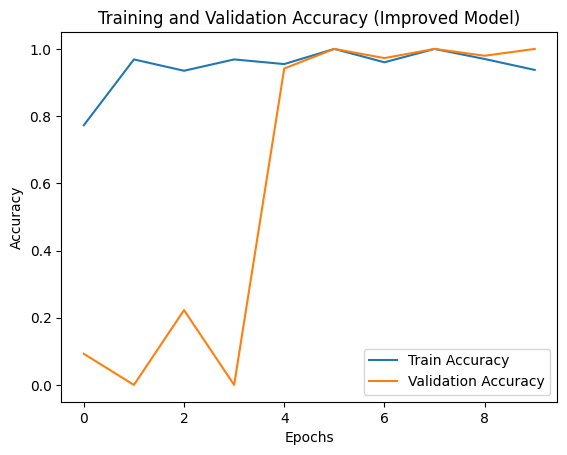

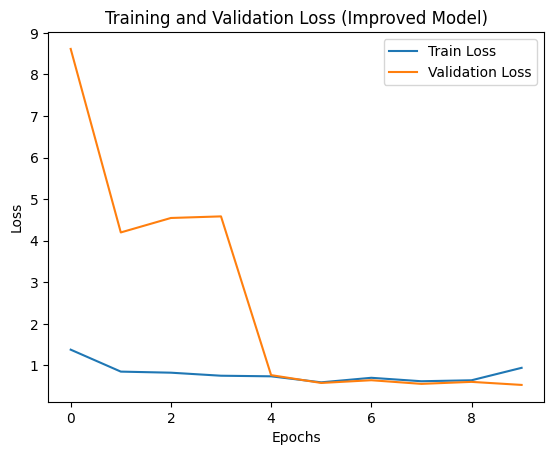

In [33]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(160, 160, 3))

# Add custom layers for the improved model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce feature dimensions
x = BatchNormalization()(x)  # Normalize features for better training stability
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Fully connected layer with regularization
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Additional dense layer with regularization
x = Dropout(0.3)(x)  # Dropout
output = Dense(train_augmented_generator.num_classes, activation='softmax')(x)  # Final classification layer

# Define the model
improved_model = Model(inputs=base_model.input, outputs=output)

# Compile the model with additional metrics
improved_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

# Train the model
history_improved = improved_model.fit(
    train_augmented_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_augmented_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = improved_model.evaluate(test_generator)

# Calculate F1-score
f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-7)
# Print test metrics
print(f"Improved Model Test Accuracy: {test_accuracy:.4f}")
print(f"Improved Model Test Precision: {test_precision:.4f}")
print(f"Improved Model Test Recall: {test_recall:.4f}")
print(f"Improved Model Test AUC: {test_auc:.4f}")
print(f"Improved Model Test F1-Score: {f1_score:.4f}")

# Save the model
improved_model.save('improved_model.h5')
print("Improved model saved successfully.")

# Plot training and validation accuracy
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Improved Model)')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Improved Model)')
plt.legend()
plt.show()

In [34]:
import matplotlib.pyplot as plt

# Base model metrics
base_model_metrics = {
    "Accuracy": val_accuracy,  # From base model evaluation
    "Precision": val_precision,
    "Recall": val_recall,
    "AUC": val_auc,
    "F1-Score": 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-7)
}

# Improved model metrics
improved_model_metrics = {
    "Accuracy": test_accuracy,  # From improved model evaluation
    "Precision": test_precision,
    "Recall": test_recall,
    "AUC": test_auc,
    "F1-Score": f1_score
}

# Print comparison of metrics
print("Comparison of Models:")
for metric in base_model_metrics.keys():
    print(f"{metric}: Base Model = {base_model_metrics[metric]:.4f}, Improved Model = {improved_model_metrics[metric]:.4f}")

Comparison of Models:
Accuracy: Base Model = 0.5087, Improved Model = 0.9806
Precision: Base Model = 0.6689, Improved Model = 0.9825
Recall: Base Model = 0.3406, Improved Model = 0.9797
AUC: Base Model = 0.9294, Improved Model = 0.9992
F1-Score: Base Model = 0.4513, Improved Model = 0.9811


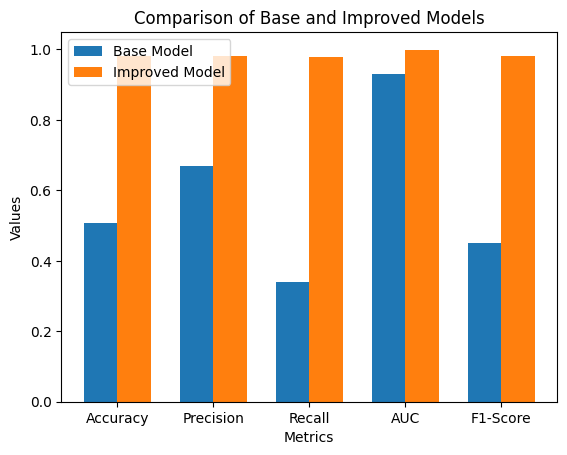

In [35]:
labels = list(base_model_metrics.keys())
base_values = list(base_model_metrics.values())
improved_values = list(improved_model_metrics.values())

x = range(len(labels))
width = 0.35  # Width of the bars

plt.bar(x, base_values, width=width, label='Base Model', align='center')
plt.bar([p + width for p in x], improved_values, width=width, label='Improved Model', align='center')

# Adding labels, title, and legend
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Base and Improved Models")
plt.xticks([p + width / 2 for p in x], labels)
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


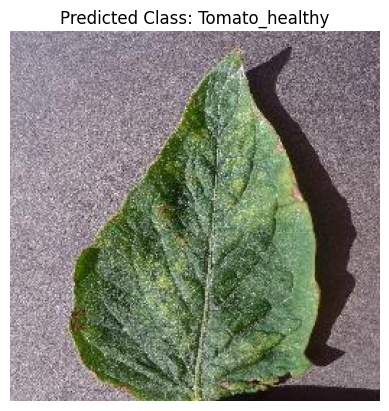

In [52]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

# Path to the trained model
model_path = 'resnet50_custom_model.h5'  # Replace with your model path
model = load_model(model_path)

# Path to the test images
folder_path = r'/content/dataset/dataset/test'  # Replace with your test folder path
img_size = (160, 160)  # Image size for ResNet50

# Class indices for the dataset
class_indices = {
    'Pepper__bell___Bacterial_spot': 0,
    'Pepper__bell___healthy': 1,
    'Potato___Early_blight': 2,
    'Potato___healthy': 3,
    'Potato___Late_blight': 4,
    'Tomato__Target_Spot': 5,
    'Tomato__Tomato_mosaic_virus': 6,
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
    'Tomato_Bacterial_spot': 8,
    'Tomato_Early_blight': 9,
    'Tomato_healthy': 10,
    'Tomato_Late_blight': 11,
    'Tomato_Leaf_Mold': 12,
    'Tomato_Septoria_leaf_spot': 13,
    'Tomato_Spider_mites_Two_spotted_spider_mite': 14
}
# Reverse the dictionary for index-to-class mapping
classes = {v: k for k, v in class_indices.items()}

# Randomly select an image from the folder
random_class = random.choice(list(class_indices.keys()))  # Choose a random class
random_file = random.choice(os.listdir(os.path.join(folder_path, random_class)))
img_path = os.path.join(folder_path, random_class, random_file)

# Load and preprocess the image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = classes[predicted_class]

# Display the image with the predicted class
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}")
plt.show()
